In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Data Preparation

In [192]:
coords = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/LatLon.csv')

In [193]:
'''
#Create dataset file that will be used for training (2003-2013)

df_train = pd.DataFrame()

for i in range(2003,2014):
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'
    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'
    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'
    
    df_temp = pd.read_csv(CD_PATH)
    df_temp = df_temp.loc[coords['pixel_id']]

    gt_temp = pd.read_csv(TD_PATH)
    gt_temp = gt_temp.loc[coords['pixel_id']]

    df_temp['value'] = gt_temp['value']

    df_train = df_train.append(df_temp)

df_train = shuffle(df_train)

PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'
df_train.to_csv(PATH + '2003_2013_shuffled.csv')
'''

"\n#Create dataset file that will be used for training (2003-2013)\n\ndf_train = pd.DataFrame()\n\nfor i in range(2003,2014):\n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'\n    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'\n    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'\n    \n    df_temp = pd.read_csv(CD_PATH)\n    df_temp = df_temp.loc[coords['pixel_id']]\n\n    gt_temp = pd.read_csv(TD_PATH)\n    gt_temp = gt_temp.loc[coords['pixel_id']]\n\n    df_temp['value'] = gt_temp['value']\n\n    df_train = df_train.append(df_temp)\n\ndf_train = shuffle(df_train)\n\nPATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'\ndf_train.to_csv(PATH + '2003_2013_shuffled.csv')\n"

In [194]:
'''
#Create dataset files that will be used for predictions (2014-2018)
for i in range(2014, 2018):
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'
    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'
    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'

    df = pd.read_csv(CD_PATH)
    gt = pd.read_csv(TD_PATH)

    df = df.loc[coords['pixel_id']]
    gt = gt.loc[coords['pixel_id']]

    df['value'] = gt['value']
    
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'
    df.to_csv(PATH + str(i) + '.csv')

'''

"\n#Create dataset files that will be used for predictions (2014-2018)\nfor i in range(2014, 2018):\n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'\n    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'\n    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'\n\n    df = pd.read_csv(CD_PATH)\n    gt = pd.read_csv(TD_PATH)\n\n    df = df.loc[coords['pixel_id']]\n    gt = gt.loc[coords['pixel_id']]\n\n    df['value'] = gt['value']\n    \n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'\n    df.to_csv(PATH + str(i) + '.csv')\n\n"

Data Loading

In [195]:
PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'

df_train = pd.read_csv(PATH + '2003_2013_shuffled.csv')

dataframes = []
groundTruth = []

for i in range(2014,2018):
    df = pd.read_csv(PATH + str(i) + '.csv')
    dataframes.append(df)
    groundTruth.append(df['value'])

Feature Selection

In [208]:
'''
selected_features = ['Road_Dist',
                    'Elec_Dist',
                    'Cultivated_Prop',
                    'aet__maximum_Normal',
                    'aet__mean_Normal',
                    'aet__minimum_Normal',
                    'cwd__maximum_Normal',
                    'cwd__mean_Normal',
                    'cwd__minimum_Normal',
                    'pck__maximum_Normal',
                    'pck__mean_Normal',
                    'pck__minimum_Normal',
                    'aet__mean_ThreeYear_Dev',
                    'cwd__mean_ThreeYear_Dev',
                    'Mean_Housing_Dens_25km',
                    'FFWI',
                    'time_since_fire']
'''
'''
selected_features = ['Elec_Dist',
                    'Cultivated_Prop',
                    'aet__maximum_Normal',
                    'cwd__mean_ThreeYear_Dev',
                    'FFWI',
                    'time_since_fire'
                    ]
'''
selected_features = [
                    'Elec_Dist',
                    'Cultivated_Prop',
                    'aet__mean_Normal',
                    'cwd__mean_Normal',
                    'aet__mean_ThreeYear_Dev',
                    'cwd__mean_ThreeYear_Dev',
                    'FFWI',
                    'time_since_fire'
                    ]



Model

In [209]:
X_train = df_train[selected_features]
y_train = df_train['value']

Grid Search for Hyperparameter Tuning

In [198]:
'''
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)
'''

"\nparam_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'sag', 'saga']}\n\ngrid_search = GridSearchCV(estimator=LogisticRegression(),\n                           param_grid=param_grid,\n                           cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(best_params)\nprint(best_score)\n"

In [210]:
clf = LogisticRegression(C = 0.1, penalty = 'l2', solver='lbfgs', max_iter=200)
clf.fit(X_train, y_train)

/home/capstone22/WildFIrePrediction/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, max_iter=200)

In [211]:
predictions = []

for df in dataframes:
    X = df[selected_features]
    pred = clf.predict(X)
    pred_prob = clf.predict_proba(X)
    #pred_prob = np.clip(pred_prob, 0, 0.1)
    fire_prob = pred_prob[:, 1]
    predictions.append(fire_prob)

Output Results for Dynamic Map

In [212]:
year = 2014

df = pd.DataFrame()
df['Latitude'] = coords['Latitude']
df['Longitude'] = coords['Longitude']

for i in range(len(predictions)):
    fire_prob_col = str(year) + '_fire_prob'
    df[fire_prob_col] = predictions[i]

    fire_value_col = str(year) + '_fire_value'
    df[fire_value_col] = groundTruth[i]

    year += 1

df.to_csv('/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/results.csv')

Metrics (ROC, Coverage)

In [213]:
def thresholding(y_prob, threshold = 0.03):
    #classifies fire probs over the threshold as 1
    result = np.copy(y_prob)
    for i, probability in enumerate(result):
        if probability >= threshold:
            result[i] = 1
        else:
            result[i] = 0
    return result

def coverage(y_true, y_pred):
    #counts number of intersecting points of fire cases between prediction and truth, then divides over total true points
    #intuitively: how much does the heatmap capture relative to the truth, ignoring false positives
    intersectingPoints = 0
    trueFires = 0
    for i in range(len(y_true)):
        if (y_true[i] == 1):
            trueFires += 1
            if (y_pred[i] == 1):
                intersectingPoints += 1
    return intersectingPoints/trueFires

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def metrics(y_true, y_pred, threshold):
    print('Fire Prob Threshold:', threshold)
    print('ROC-AUC score:', roc_auc_score(y_true, y_pred))
    plot_roc_curve(y_true, y_pred)
    print('Coverage:', coverage(y_true, y_pred), '\n')



Heatmap Construction + Metrics

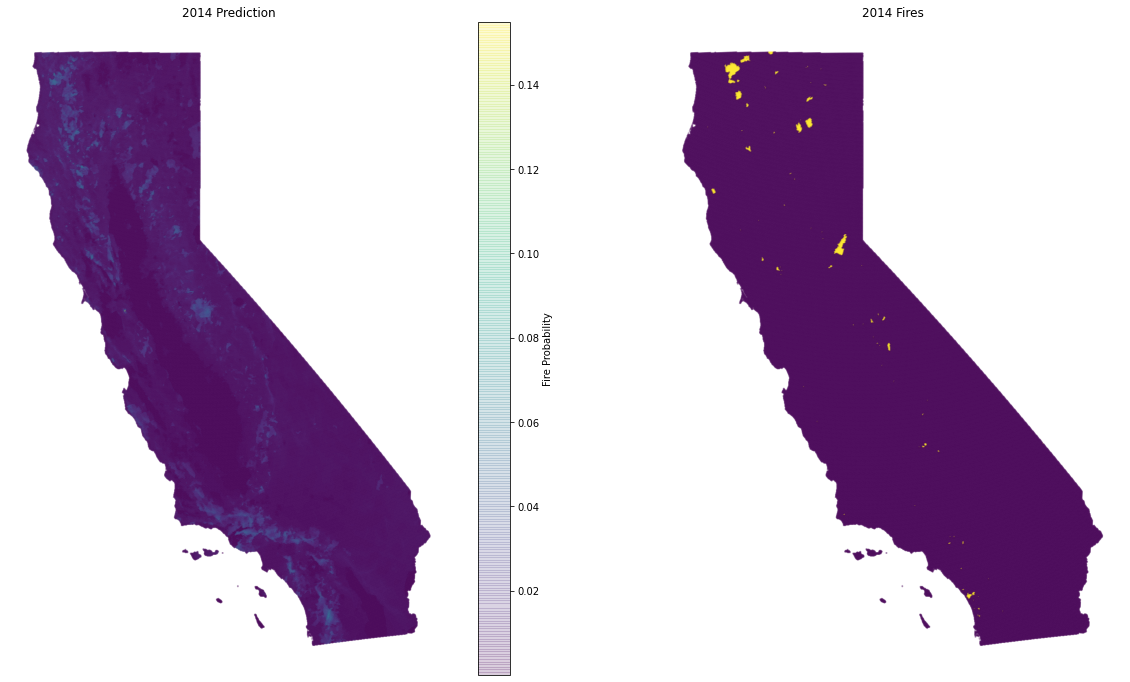

Fire Prob Threshold: 0.005
ROC-AUC score: 0.7096771019292469
Coverage: 0.8364312267657993 

Fire Prob Threshold: 0.01
ROC-AUC score: 0.5823282660964877
Coverage: 0.3025092936802974 

Fire Prob Threshold: 0.02
ROC-AUC score: 0.5184665166939881
Coverage: 0.07899628252788105 

Fire Prob Threshold: 0.03
ROC-AUC score: 0.5015874229949115
Coverage: 0.013011152416356878 



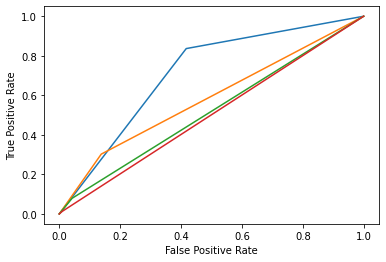

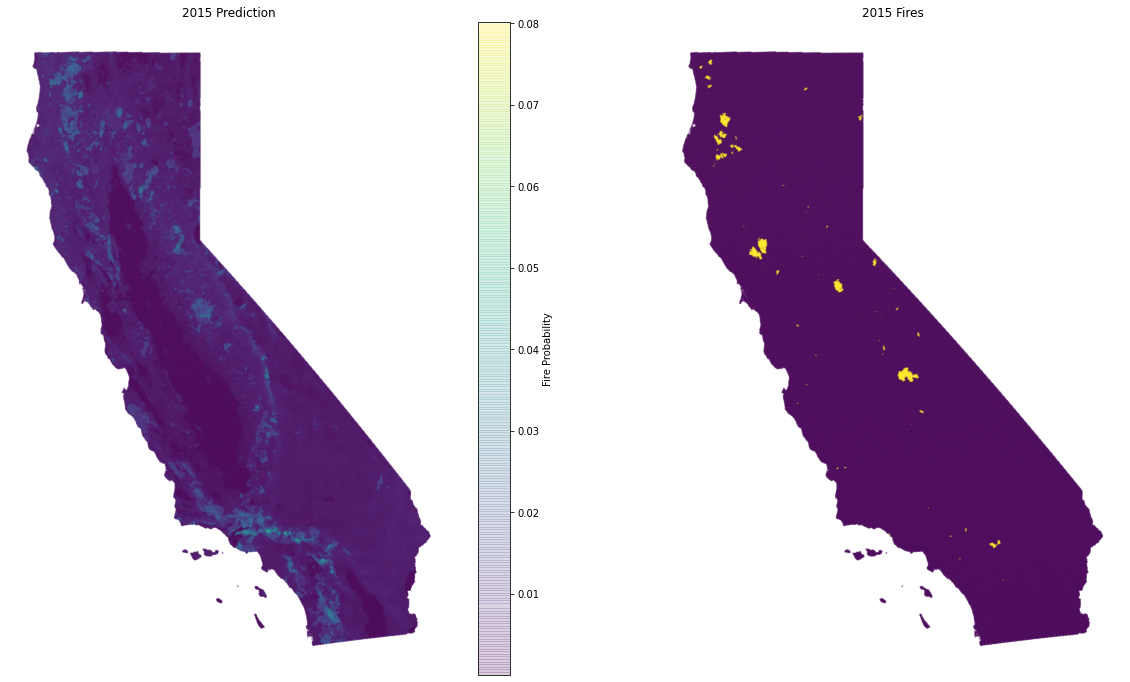

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6938169386241324
Coverage: 0.7120879120879121 

Fire Prob Threshold: 0.01
ROC-AUC score: 0.5483339778451343
Coverage: 0.20156985871271585 

Fire Prob Threshold: 0.02
ROC-AUC score: 0.5002759176446798
Coverage: 0.02197802197802198 

Fire Prob Threshold: 0.03
ROC-AUC score: 0.49890635126377186
Coverage: 0.0 



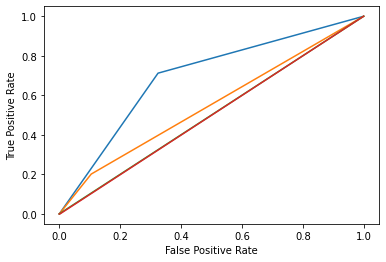

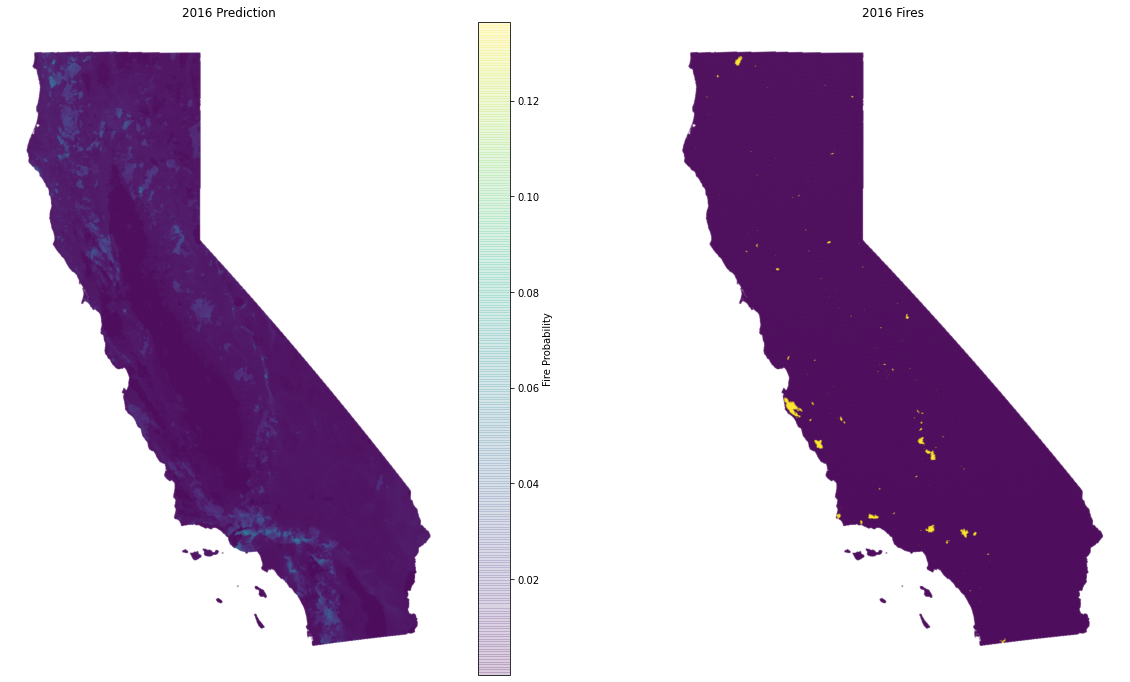

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6842911189577314
Coverage: 0.7268539843390143 

Fire Prob Threshold: 0.01
ROC-AUC score: 0.6441445483015228
Coverage: 0.4058037770612621 

Fire Prob Threshold: 0.02
ROC-AUC score: 0.5151582829145014
Coverage: 0.06080147397512667 

Fire Prob Threshold: 0.03
ROC-AUC score: 0.504976804311027
Coverage: 0.01704283740211884 



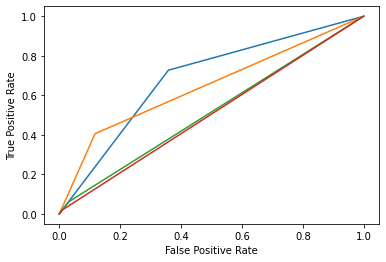

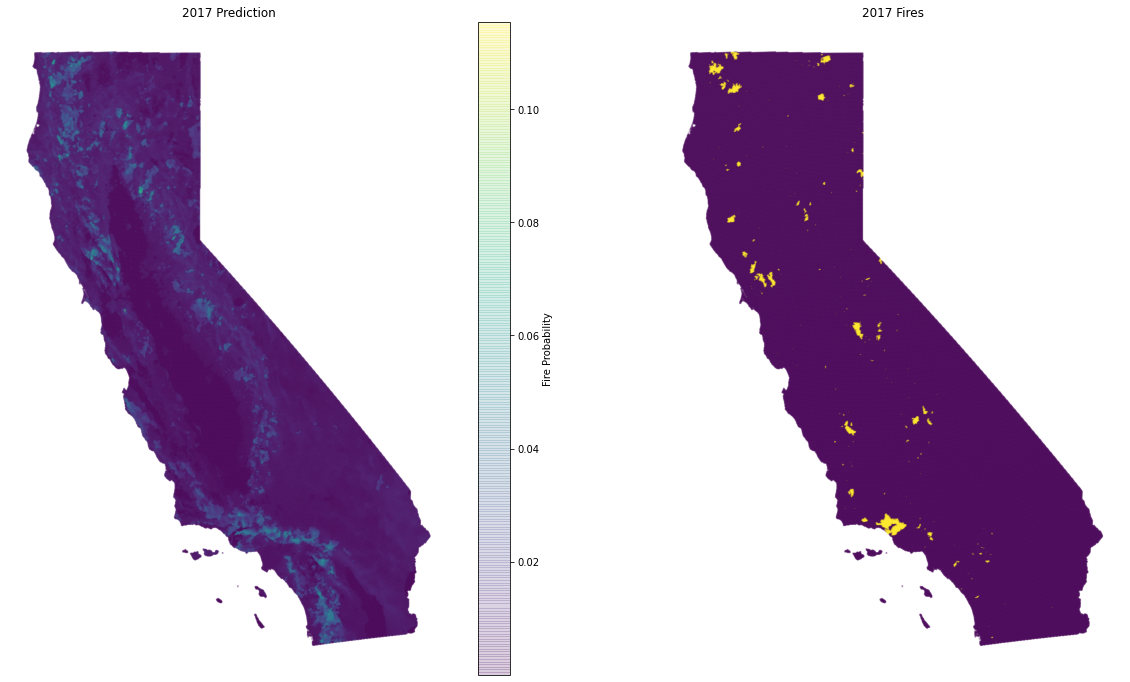

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6301240916228297
Coverage: 0.7722498618021006 

Fire Prob Threshold: 0.01
ROC-AUC score: 0.644365748067789
Coverage: 0.46839874700571216 

Fire Prob Threshold: 0.02
ROC-AUC score: 0.5500306493155066
Coverage: 0.16510042380689147 

Fire Prob Threshold: 0.03
ROC-AUC score: 0.5120398190070441
Coverage: 0.04809286898839138 



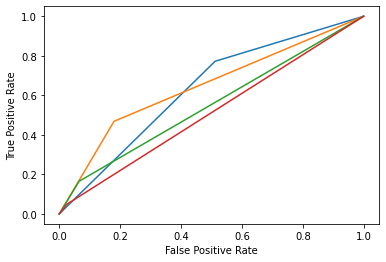

In [214]:
year = 2014
for i in range(len(predictions)):
    year = 2014 + i

    fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [6,5]}, figsize = (20, 12))
    
    probHeatmap = axs[0].scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = 1, c = predictions[i])
    axs[0].set_title(str(year) + ' Prediction')
    axs[0].axis('off')

    truthHeatmap = axs[1].scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = 1, c = groundTruth[i])
    axs[1].set_title(str(year) + ' Fires')
    axs[1].axis('off')


    fig.colorbar(probHeatmap, ax = axs[0], label="Fire Probability", orientation="vertical")

    plt.show()

    thresholds = [0.005, 0.01, 0.02, 0.03]

    for threshold in thresholds:
        y_pred_thresholded = thresholding(predictions[i], threshold)
        metrics(groundTruth[i], y_pred_thresholded, threshold)

